In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from pandas_datareader import data as pdr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import seaborn as sns

In [93]:
start_date = '2001-01-01'
end_date = '2023-11-01'

TMUS = yf.download('TMUS', start=start_date, end=end_date, interval='1mo')
VZ = yf.download('VZ', start=start_date, end=end_date, interval='1mo')
T = yf.download('T', start=start_date, end=end_date, interval='1mo')
sp500 = yf.download('^GSPC', start=start_date, end=end_date, interval='1mo')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [96]:
df = pd.DataFrame({
    'TMUS': TMUS['Adj Close'],
    'VZ': VZ['Adj Close'],
    'T': T['Adj Close'],
    'SP500': sp500['Adj Close'],
})
file_path = 'C:/Users/HHGiang/Documents/KEIO/3FZ/Giang.chap8.xlsx'
#df.to_excel(file_path)

In [97]:
df = df.dropna()

In [98]:
df.head()

,TMUS,VZ,T,SP500
Date,,,,
2007-05-01,59.091991,17.940050,9.244858,1530.619995
2007-06-01,54.750408,16.967419,9.280638,1503.349976
2007-07-01,60.682804,17.565018,8.757342,1455.270020
2007-08-01,45.222115,17.428175,9.019624,1473.989990
2007-09-01,45.205544,18.426920,9.571612,1526.750000


In [84]:
df.tail()

,TMUS,VZ,T,SP500,lTMUS,lSP500,lT,lVZ
Date,,,,,,,,
2023-06-01,4.933754,35.772388,15.376841,8.400745,1.596100,2.128320,2.732863,3.577176
2023-07-01,4.925586,32.780937,13.998228,8.431409,1.594443,2.131964,2.638931,3.489847
2023-08-01,4.914491,34.248959,14.512750,8.413533,1.592188,2.129842,2.675028,3.533656
2023-09-01,4.942000,31.732670,14.738439,8.363587,1.597770,2.123887,2.690459,3.457347
2023-10-01,4.968841,34.395824,15.111315,8.341362,1.603187,2.121227,2.715444,3.537935


In [50]:
df1 = np.log(df).diff().dropna()

In [51]:
df1.head()

,TMUS,VZ,T,SP500
Date,,,,
2007-06-01,-0.076311,-0.055740,0.003863,-0.017977
2007-07-01,0.102876,0.034614,-0.058038,-0.032504
2007-08-01,-0.294074,-0.007821,0.029510,0.012782
2007-09-01,-0.000367,0.055724,0.059399,0.035168
2007-10-01,-0.192639,0.039629,-0.012366,0.014714


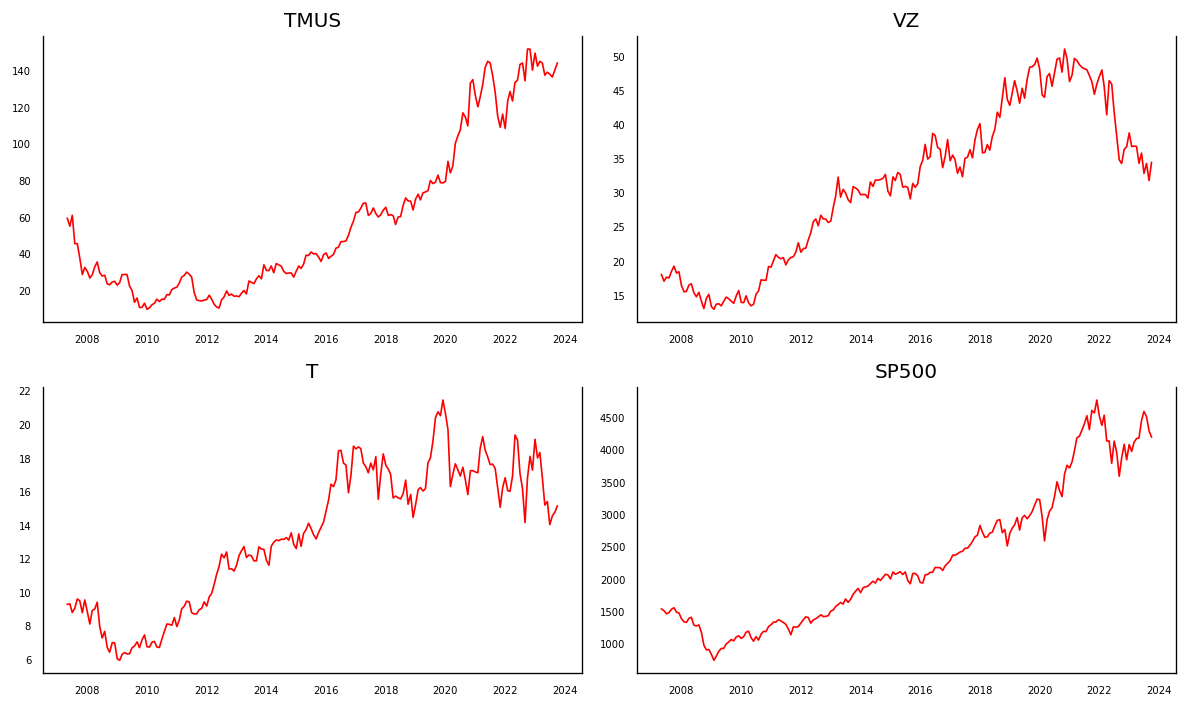

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize=(10,6))

axs = axes.flatten()

for i, col in enumerate(df.columns):
    monthly = df[col]
    axs[i].plot(monthly, color='red', linewidth=1)
    axs[i].set_title(col)
    axs[i].xaxis.set_ticks_position('none')
    axs[i].yaxis.set_ticks_position('none')
    axs[i].spines['top'].set_alpha(0)
    axs[i].tick_params(labelsize=6)
    
for i in range(len(df.columns),len(axs)):
    fig.delaxes(axs[i])
    
plt.tight_layout()
plt.show()

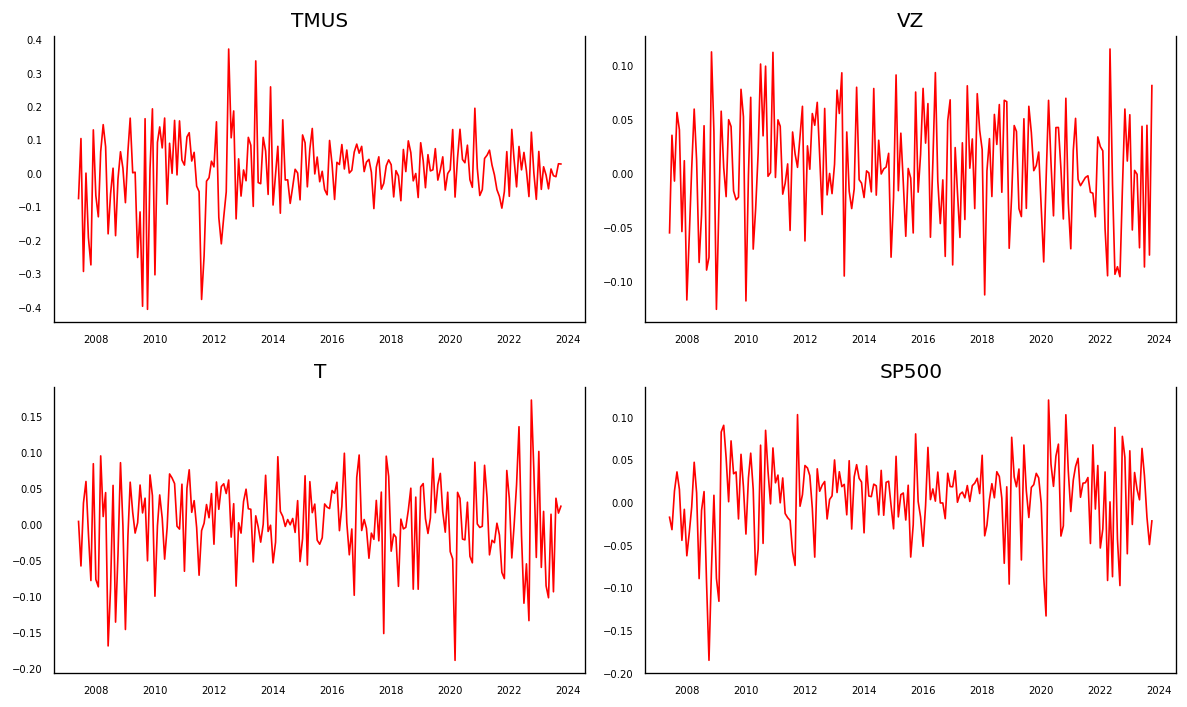

In [52]:
fig, axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize=(10,6))

axs = axes.flatten()

for i, col in enumerate(df1.columns):
    monthly = df1[col]
    axs[i].plot(monthly, color='red', linewidth=1)
    axs[i].set_title(col)
    axs[i].xaxis.set_ticks_position('none')
    axs[i].yaxis.set_ticks_position('none')
    axs[i].spines['top'].set_alpha(0)
    axs[i].tick_params(labelsize=6)
    
for i in range(len(df1.columns),len(axs)):
    fig.delaxes(axs[i])
    
plt.tight_layout()
plt.show()

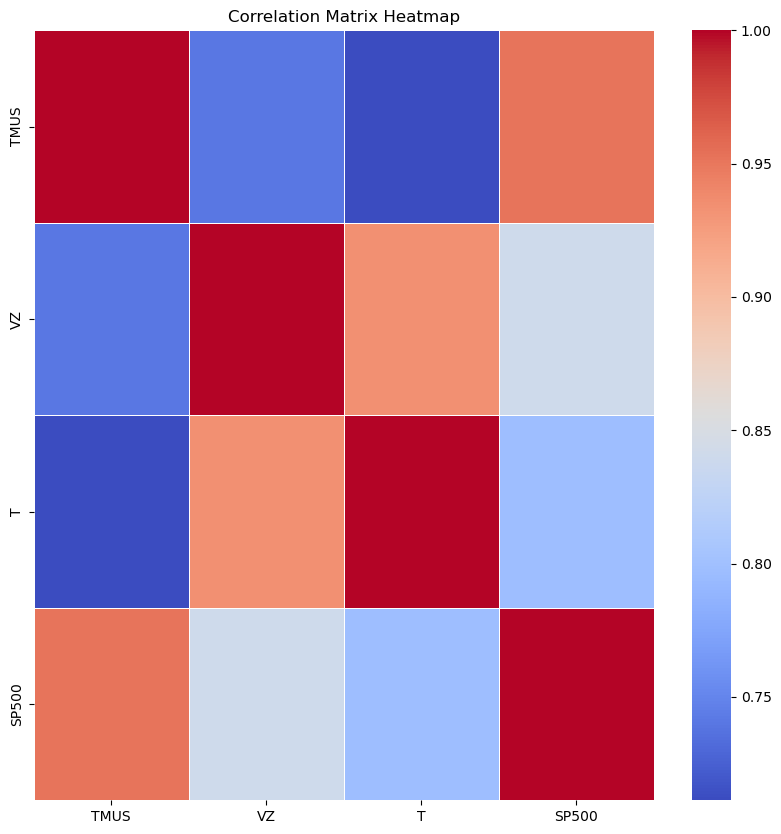

In [24]:
cor_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_matrix,annot=False,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

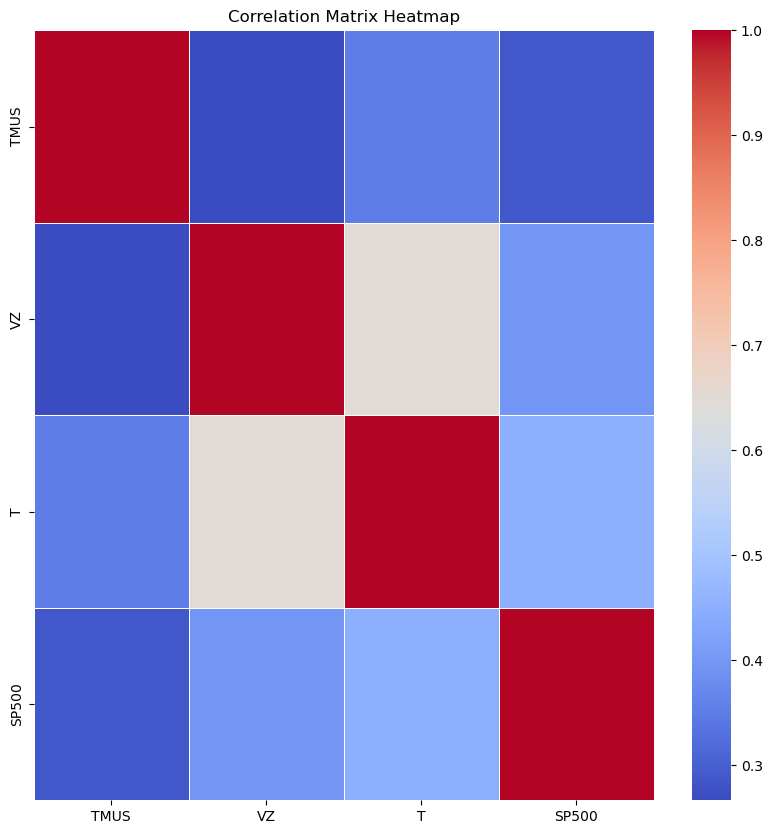

In [53]:
cor_matrix = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_matrix,annot=False,cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
!pip install arch

     ------------------------------------- 922.8/922.8 kB 19.4 MB/s eta 0:00:00


In [33]:
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

In [34]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resT = ADF(df['T'], lags=12)
print(resT.summary()) # cannot reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.120
P-value                         0.707
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [54]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resT = ADF(df1['T'], lags=12)
print(resT.summary()) # reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.973
P-value                         0.002
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [39]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resVZ = ADF(df['VZ'], lags=12)
print(resVZ.summary()) # cannot reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.465
P-value                         0.551
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resVZ = ADF(df1['VZ'], lags=12)
print(resVZ.summary()) # cannot reject null hypothesis 

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.960
P-value                         0.039
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [36]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resTMUS = ADF(df['TMUS'], lags=12)
print(resTMUS.summary()) # cannot reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                  0.961
P-value                         0.994
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resTMUS = ADF(df1['TMUS'], lags=12)
print(resTMUS.summary()) # reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.096
P-value                         0.001
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [37]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resSP500 = ADF(df['SP500'], lags=12)
print(resTMUS.summary()) # cannot reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                  0.961
P-value                         0.994
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
# ['T', 'VZ', 'TMUS', '^GSPC']
resSP500 = ADF(df1['SP500'], lags=12)
print(resTMUS.summary()) # reject null hypothesis

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.096
P-value                         0.001
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


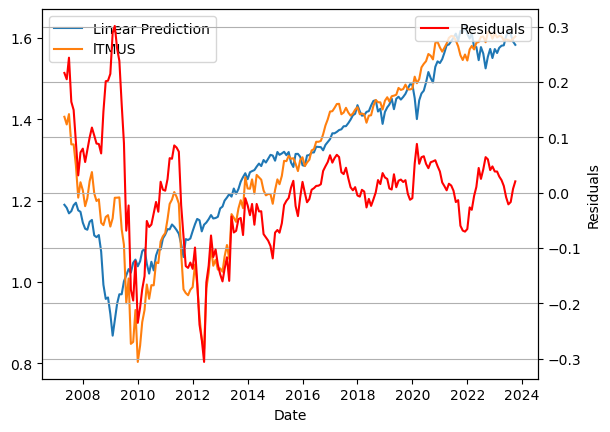

In [79]:
df['lTMUS'] = df['TMUS'].apply(lambda x : np.log(x))
df['lSP500'] = df['SP500'].apply(lambda x : np.log(x))
formula = 'lTMUS ~ lSP500'
results = smf.ols(formula, df).fit()
residuals = results.resid
lTMUS_fit = results.fittedvalues

fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(lTMUS_fit, label='Linear Prediction')

ax1.plot(df['lTMUS'], label='lTMUS')
ax1.set_xlabel('Date')
ax1.legend(loc=0)
ax2 = plt.twinx()
ax2.set_ylabel('Residuals')
residuals_line = ax2.plot(residuals, label='Residuals')[0]
residuals_line.set_color('red')
ax2.legend(loc=0)
plt.grid(True)
plt.show()

In [74]:
res = DFGLS(residuals, max_lags=12)
print(res.summary()) # cannot reject null hypothesis

      Dickey-Fuller GLS Results      
Test Statistic                 -1.605
P-value                         0.106
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -2.67 (1%), -2.05 (5%), -1.73 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [80]:
df['lTMUS'] = df['TMUS'].apply(lambda x : np.log(x))
df['lT'] = df['T'].apply(lambda x : np.log(x))
formula = 'lTMUS ~ lT'
results = smf.ols(formula, df).fit()
residuals = results.resid
lTMUS_fit = results.fittedvalues
res = DFGLS(residuals, max_lags=12)
print(res.summary()) # cannot reject null hypothesis

      Dickey-Fuller GLS Results      
Test Statistic                 -1.086
P-value                         0.259
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -2.67 (1%), -2.05 (5%), -1.73 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [81]:
df['lTMUS'] = df['TMUS'].apply(lambda x : np.log(x))
df['lVZ'] = df['VZ'].apply(lambda x : np.log(x))
formula = 'lTMUS ~ lVZ'
results = smf.ols(formula, df).fit()
residuals = results.resid
lTMUS_fit = results.fittedvalues
res = DFGLS(residuals, max_lags=12)
print(res.summary()) # cannot reject null hypothesis

      Dickey-Fuller GLS Results      
Test Statistic                 -0.967
P-value                         0.306
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.67 (1%), -2.05 (5%), -1.73 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [82]:
formula = 'df.TMUS ~ df.VZ'
results = smf.ols(formula, df).fit()
residuals = results.resid
lTMUS_fit = results.fittedvalues
res = DFGLS(residuals, max_lags=12)
print(res.summary()) # cannot reject null hypothesis

      Dickey-Fuller GLS Results      
Test Statistic                 -0.923
P-value                         0.325
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -2.67 (1%), -2.05 (5%), -1.73 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [85]:
formula = 'df.TMUS ~ df.SP500'
results = smf.ols(formula, df).fit()
residuals = results.resid
lTMUS_fit = results.fittedvalues
res = DFGLS(residuals, max_lags=12)
print(res.summary()) # cannot reject null hypothesis

      Dickey-Fuller GLS Results      
Test Statistic                 -1.520
P-value                         0.125
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -2.67 (1%), -2.05 (5%), -1.73 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [86]:
formula = 'df.TMUS ~ df.T'
results = smf.ols(formula, df).fit()
residuals = results.resid
lTMUS_fit = results.fittedvalues
res = DFGLS(residuals, max_lags=12)
print(res.summary()) # cannot reject null hypothesis

PatsyError: Number of rows mismatch between data argument and df.T (198 versus 8)
    df.TMUS ~ df.T
              ^^^^

In [109]:
from statsmodels.tsa.vector_ar import vecm
abspath = 'C:/Users/HHGiang/Documents/KEIO/3FZ/'
data = pd.read_excel(abspath + 'Giang.chap8.xlsx', index_col=0)
data = data.dropna()

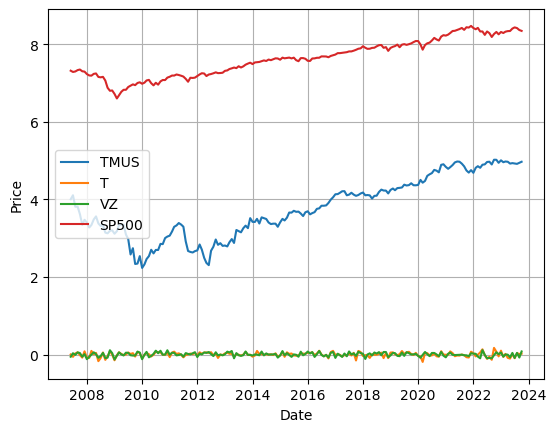

In [110]:
plt.figure()
plt.plot(df1['TMUS'], label='TMUS')
plt.plot(df1['T'], label='T')
plt.plot(df1['VZ'], label='VZ')
plt.plot(df1['SP500'], label='SP500')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [111]:
from statsmodels.tsa.vector_ar import vecm
model = vecm.select_order(data,maxlags=12)
print(model.summary())


 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        12.41      12.75*   2.441e+05      12.55*
1        12.37       13.00   2.368e+05       12.63
2       12.35*       13.26  2.312e+05*       12.72
3        12.44       13.62   2.533e+05       12.92
4        12.43       13.89   2.506e+05       13.02
5        12.50       14.24   2.703e+05       13.21
6        12.52       14.54   2.756e+05       13.33
7        12.56       14.86   2.893e+05       13.49
8        12.61       15.19   3.058e+05       13.65
9        12.55       15.41   2.914e+05       13.71
10       12.63       15.76   3.176e+05       13.90
11       12.49       15.90   2.797e+05       13.87
12       12.49       16.18   2.850e+05       13.99
--------------------------------------------------


In [114]:
vec_rank1 = vecm.select_coint_rank(data, det_order = 1, k_ar_diff = 2, 
                                   method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   4          63.93          62.52
  1   4          32.03          41.08
-------------------------------------


In [115]:
vec_rank1 = vecm.select_coint_rank(data, det_order = 1, k_ar_diff = 2, 
                                   method = 'trace', signif=0.05)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   4          63.93          55.25
  1   4          32.03          35.01
-------------------------------------


In [116]:
vec_rank2 = vecm.select_coint_rank(data, det_order = 1, k_ar_diff = 2,
                                   method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          31.90          36.19
-------------------------------------


In [117]:
vec_rank2 = vecm.select_coint_rank(data, det_order = 1, k_ar_diff = 2,
                                   method = 'maxeig', signif=0.05)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          31.90          30.82
  1   2          23.98          24.25
-------------------------------------


In [118]:
model = vecm.VECM(data, k_ar_diff=2, coint_rank=2, deterministic='co')
res = model.fit()
print(res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation TMUS
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5142      0.904     -2.781      0.005      -4.286      -0.742
L1.TMUS       -0.0441      0.080     -0.551      0.582      -0.201       0.113
L1.VZ         -0.3051      0.258     -1.181      0.237      -0.811       0.201
L1.T           0.5218      0.532      0.981      0.327      -0.521       1.564
L1.SP500      -0.0101      0.003     -3.145      0.002      -0.016      -0.004
L2.TMUS       -0.0447      0.081     -0.554      0.579      -0.203       0.113
L2.VZ          0.3662      0.258      1.417      0.156      -0.140       0.873
L2.T          -0.1385      0.544     -0.254      0.799      -1.205       0.928
L2.SP500      -0.0082      0.003     -2.522      0.012      -0.015      -0.002
Det. terms outside the coint. relation & lagged

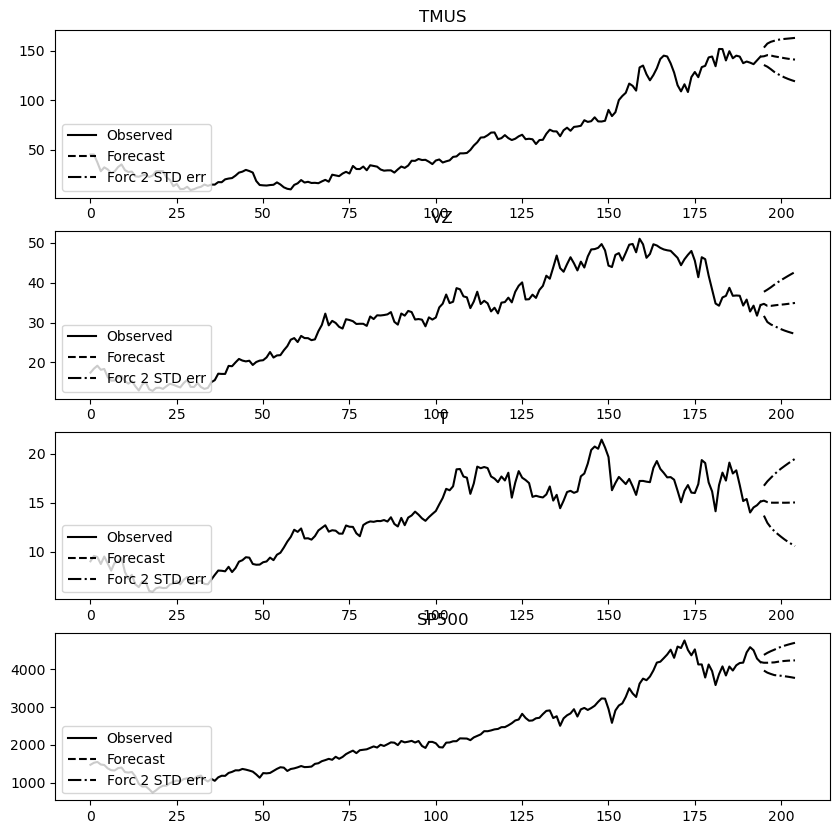

In [120]:
res.plot_forecast(10)